### Before starting the project , i want really thank `EPSILON` for their efforts 
I started my journey with them about a 9 month ago , i was very intesrested with my new journy as a step by step data scienest , I started my round with **ENG/Ahmed Noaman** and **ENG/Ayed Ali** but unfortunately I experienced some health conditions leading me to do two surgeries and making a freeze for the diploma , after I got well and come back from the freeze i met agreat instructor **ENG/Salah Tarek** who i want to realy thank him for his effort and of course **ENG/Mohab Allam** , today el hamdullah i am with good health condithions , i have graduated from my college with excellent degree , witnissing the end of the journey with epsilon but it is not an end it is just a start with another journey with them , Now i am doing an end to end data science project :) 

## LifeCycle of our project 
- 1) Unterstanding the Problem Statemet
- 2) Data Colleection
- 3) Data Cleaning Phase
- 4) Explotary Data Analysis (EDA)
- 5) Feature Engineering
- 6) EDA & Data Visualization
- 7) data Preprocessing (DPP)
- 8) Feature Selection
- 9) Pick and Tune an Algorithm
- 10) Validate and Evaluate
- 11) Best Model Selection
- 12) Project Deployment

### 1) Problem statement
- This project understands how the student's performance (Maths scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data set consists of 8 column (our main features).

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('student_performance_data.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

## 3) Data Cleaning

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.describe(include = "O")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 4) Explotary Data Analysis (EDA)

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
print(f"{df['gender'].nunique()} Unique value in gender ->{df['gender'].unique()}")
print(f"{df['race/ethnicity'].nunique()} unique value in race/ethnicity ->{df['race/ethnicity'].unique()}")
print(f"{df['parental level of education'].nunique()} Unique value in parental level of education ->{df['parental level of education'].unique()}")
print(f"{df['lunch'].nunique()} Unique value in lunch ->{df['lunch'].unique()}")
print(f"{df['test preparation course'].nunique()} Unique value in test preparation course ->{df['test preparation course'].unique()}")



2 Unique value in gender ->['female' 'male']
5 unique value in race/ethnicity ->['group B' 'group C' 'group A' 'group D' 'group E']
6 Unique value in parental level of education ->["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
2 Unique value in lunch ->['standard' 'free/reduced']
2 Unique value in test preparation course ->['none' 'completed']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 5) Feature Engineering

In [14]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 6) EDA & Data Visualization

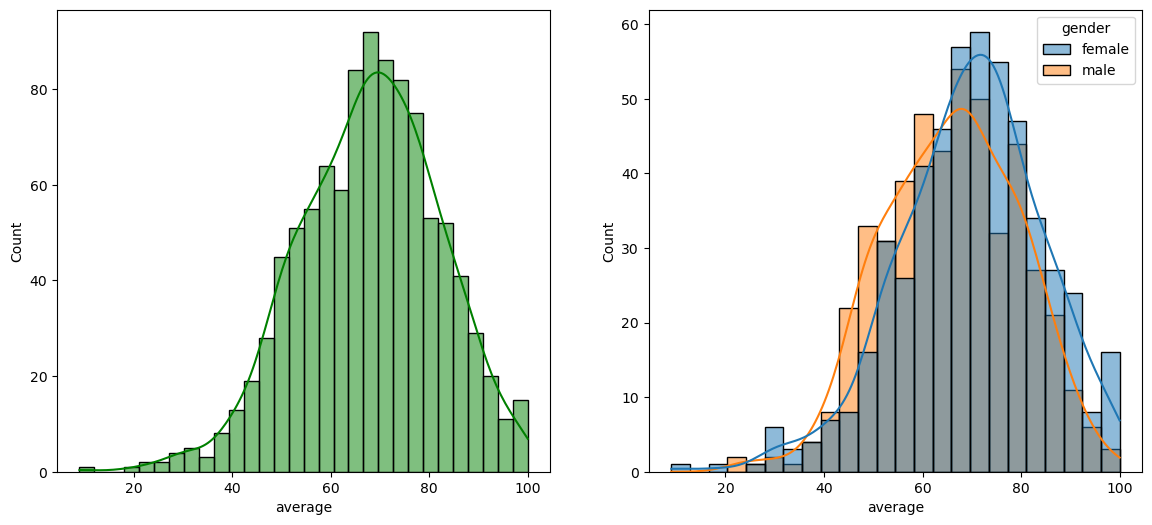

In [15]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

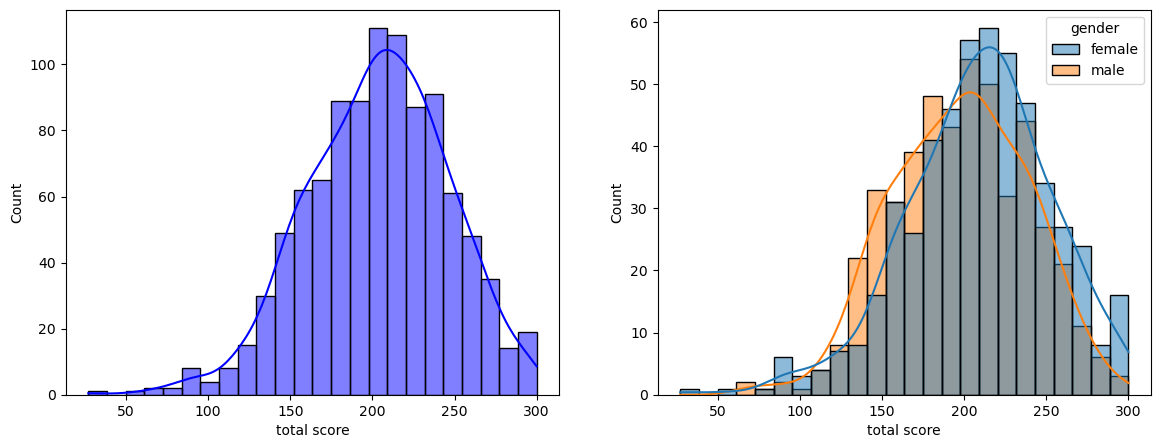

In [16]:
fig, ax =plt.subplots(1,2,figsize=(14,5))
plt.subplot(121)
sns.histplot(data=df, x='total score',kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True,hue='gender')
plt.show()

#### Insight
- female studends do perform well then male students

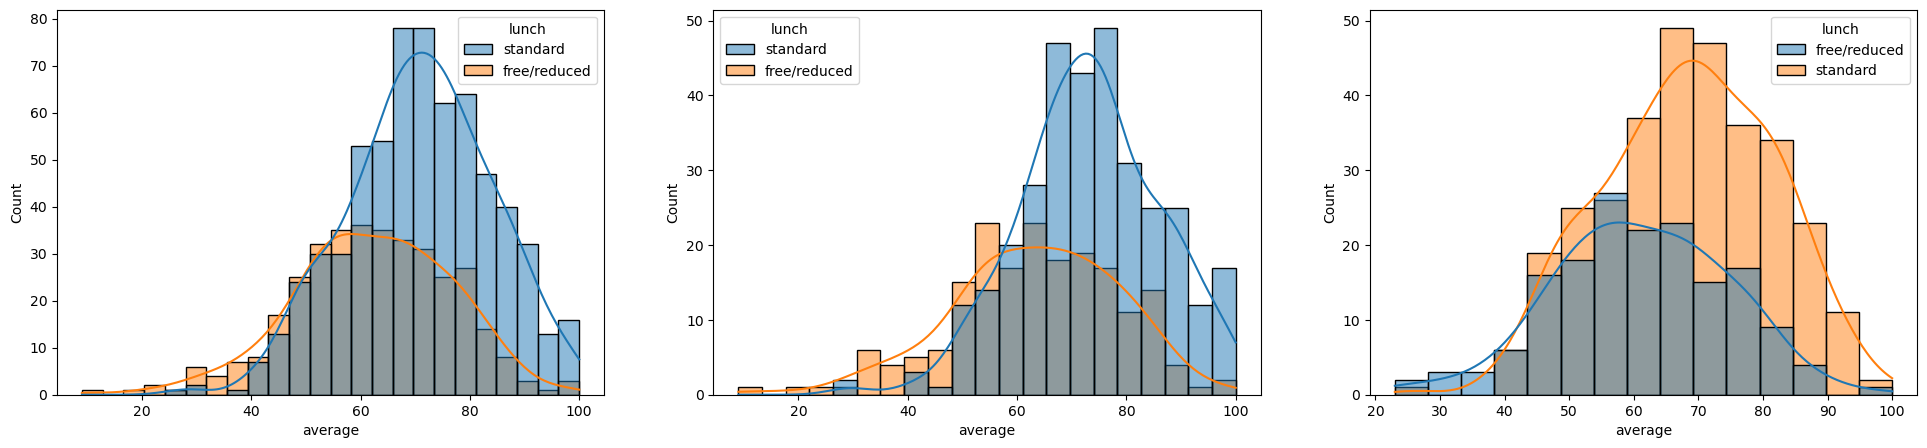

In [17]:
fig, ax =plt.subplots(1,3,figsize=(24,5))
plt.subplot(131)
sns.histplot(data=df ,x='average',kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


##### Insights
- Standard lunch helps performe well in exam for both male and female student.

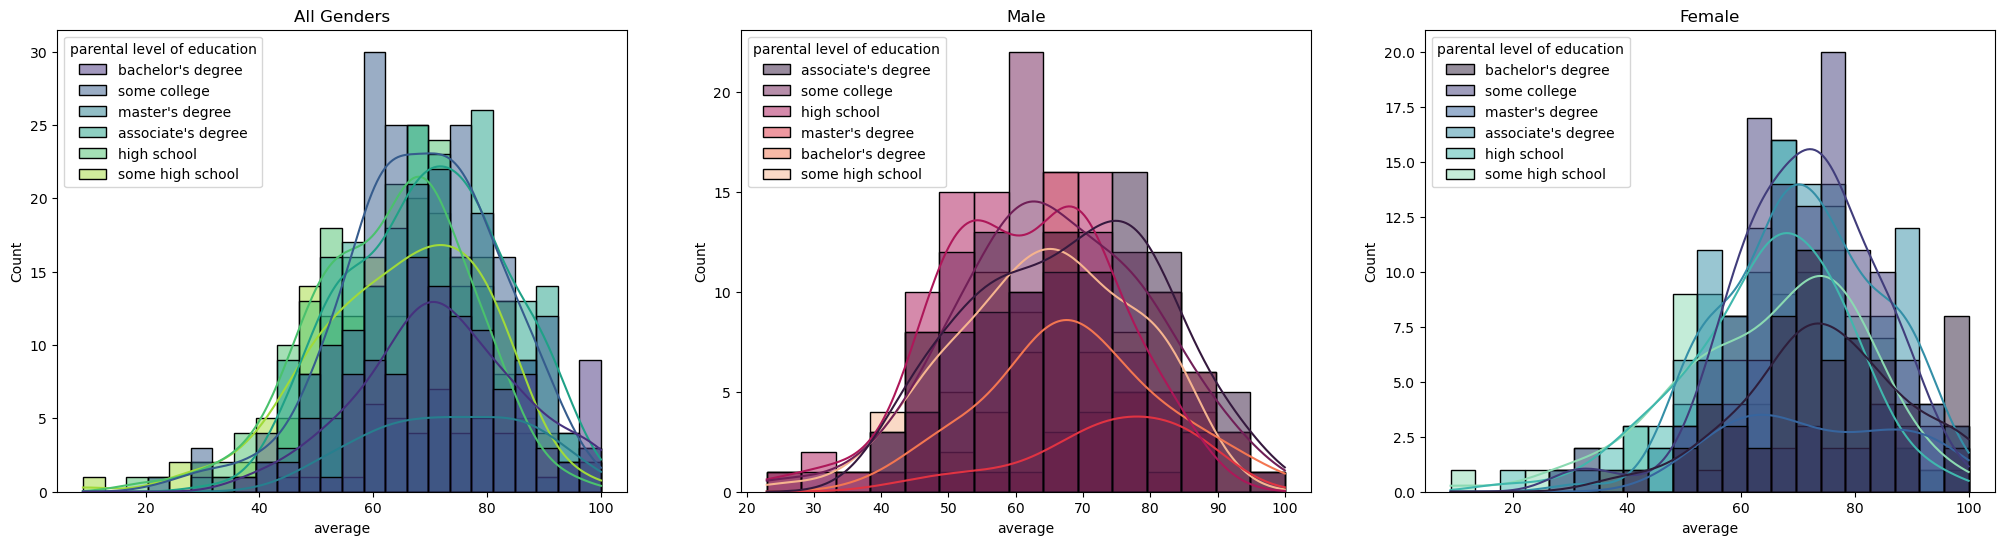

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education',palette="viridis")
plt.title("All Genders")
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education',palette="rocket")
plt.title("Male")
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education',palette="mako")
plt.title("Female")
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- but we will check it agin in following analysis

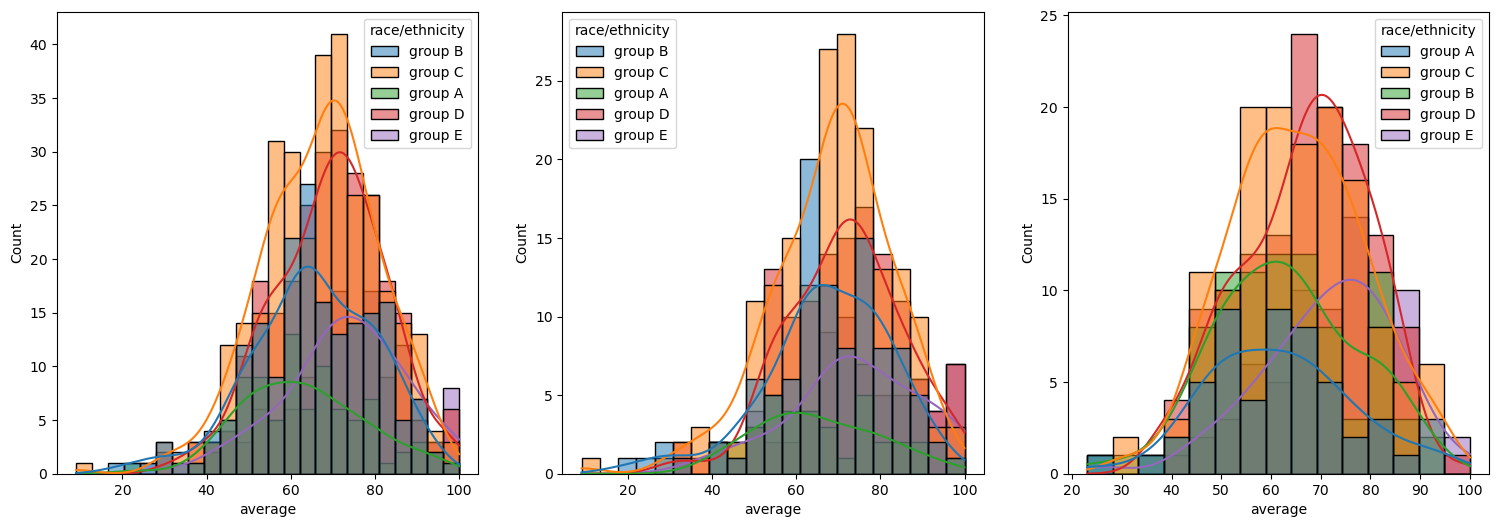

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female       

#### Maximumum score of students in all three subjects

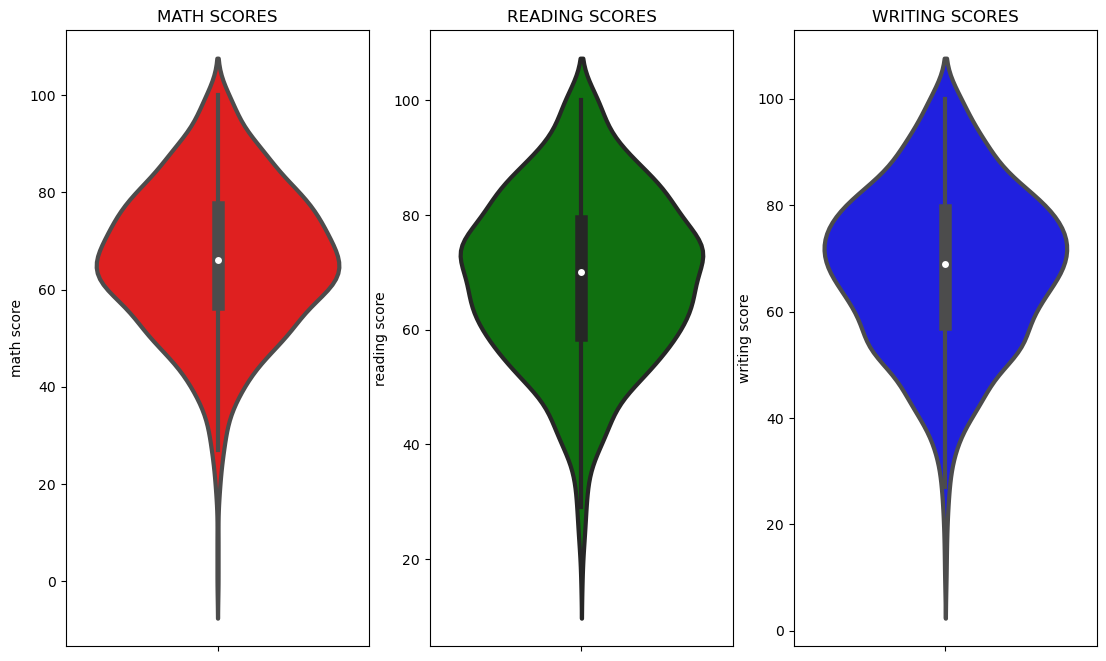

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Multivariate analysis using pieplot

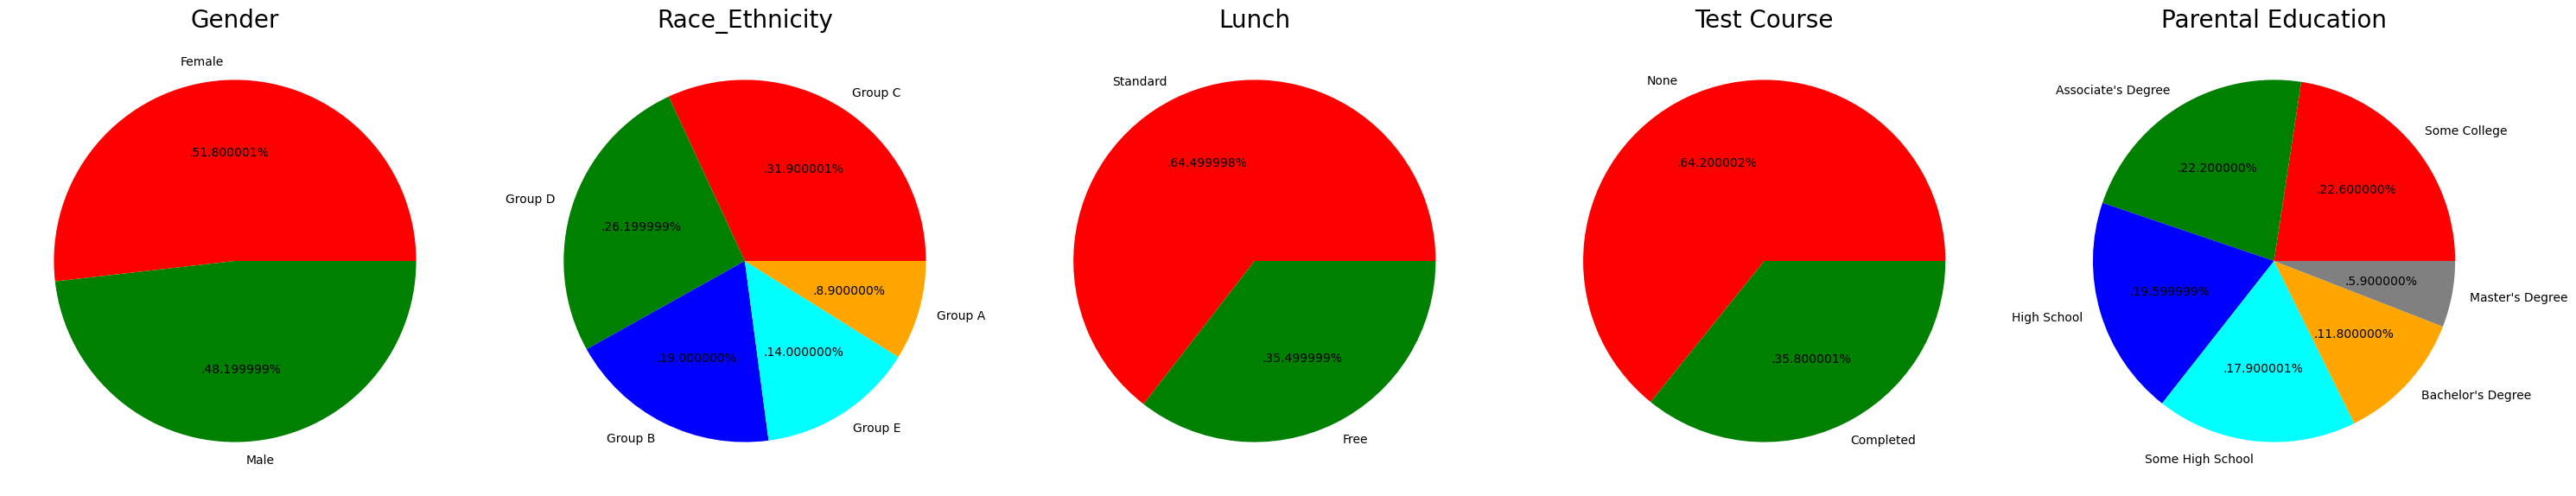

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

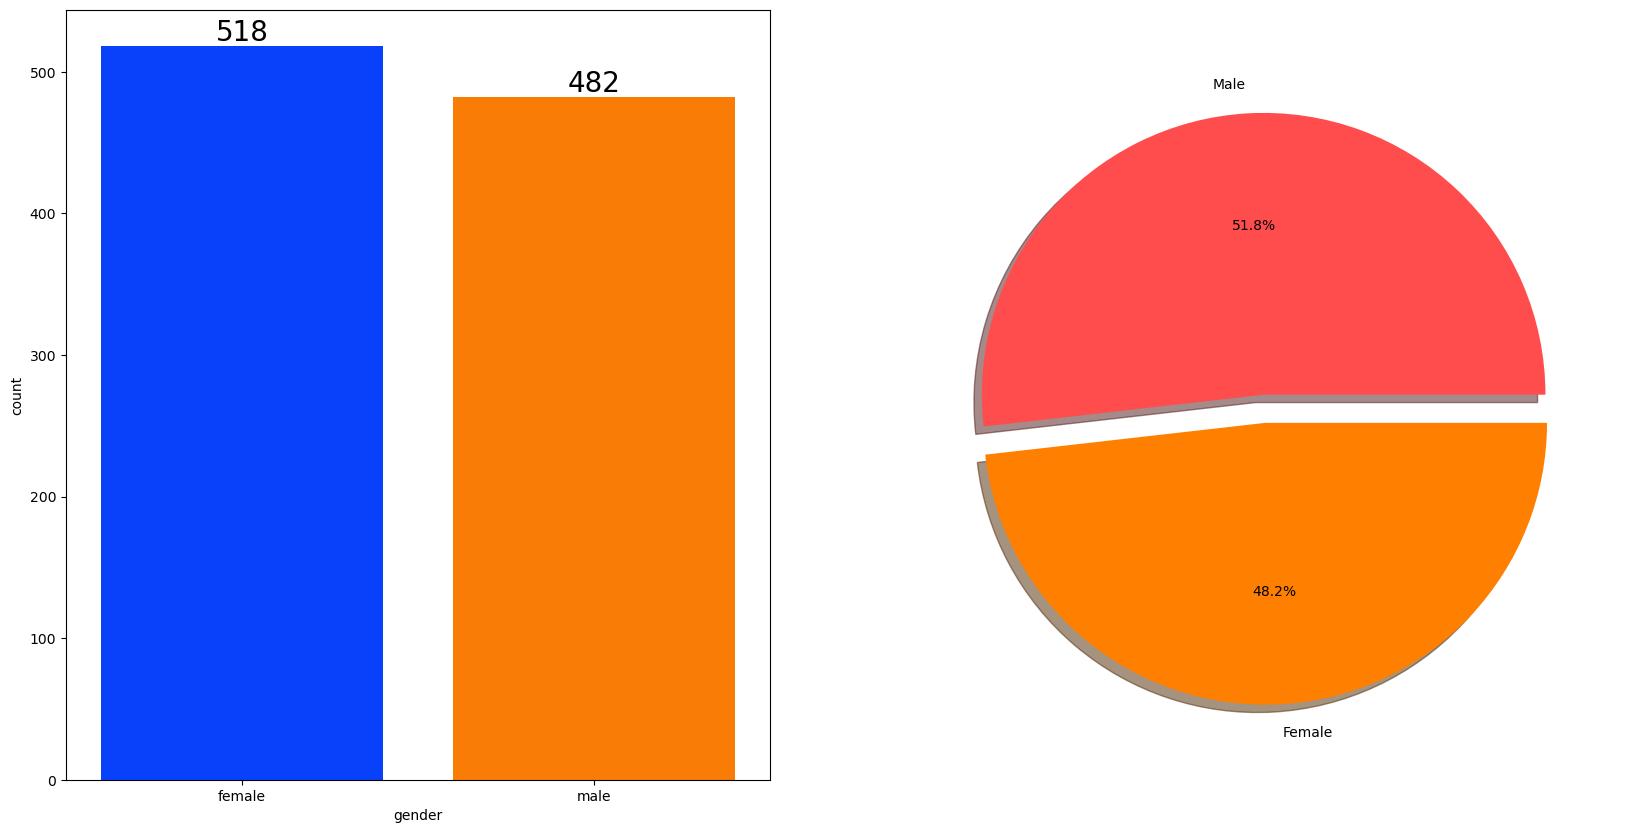

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS
* Is gender has any impact on student's performance ? 

In [23]:
gender_group = df.groupby(df['gender'])

In [24]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


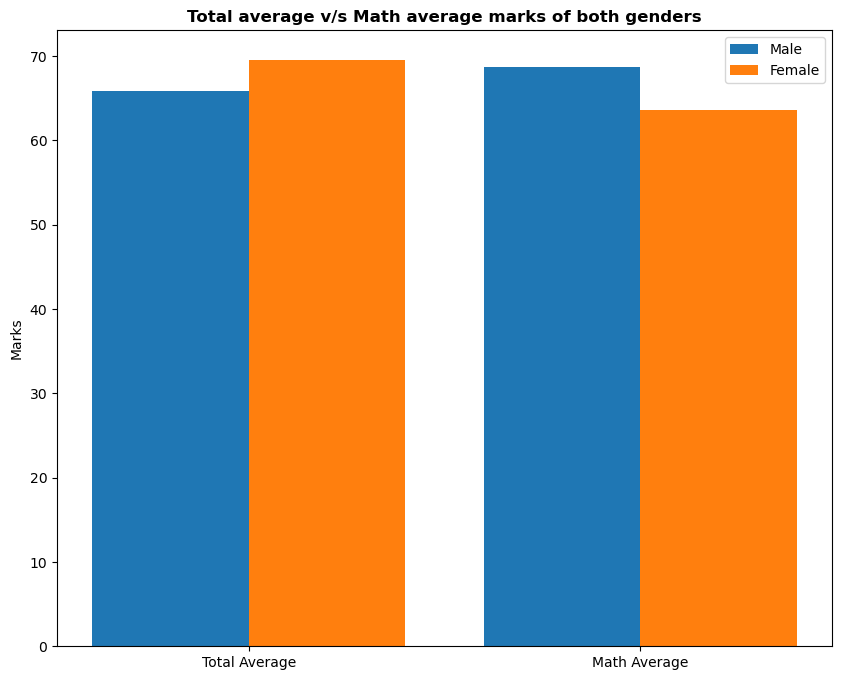

In [25]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Assuming 'average' and 'math_score' are columns in your original DataFrame
female_scores = [gender_group.get_group('female')['average'].mean(), gender_group.get_group('female')['math score'].mean()]
male_scores = [gender_group.get_group('male')['average'].mean(), gender_group.get_group('male')['math score'].mean()]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.    

#### RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS 
* How is Group wise distribution ?

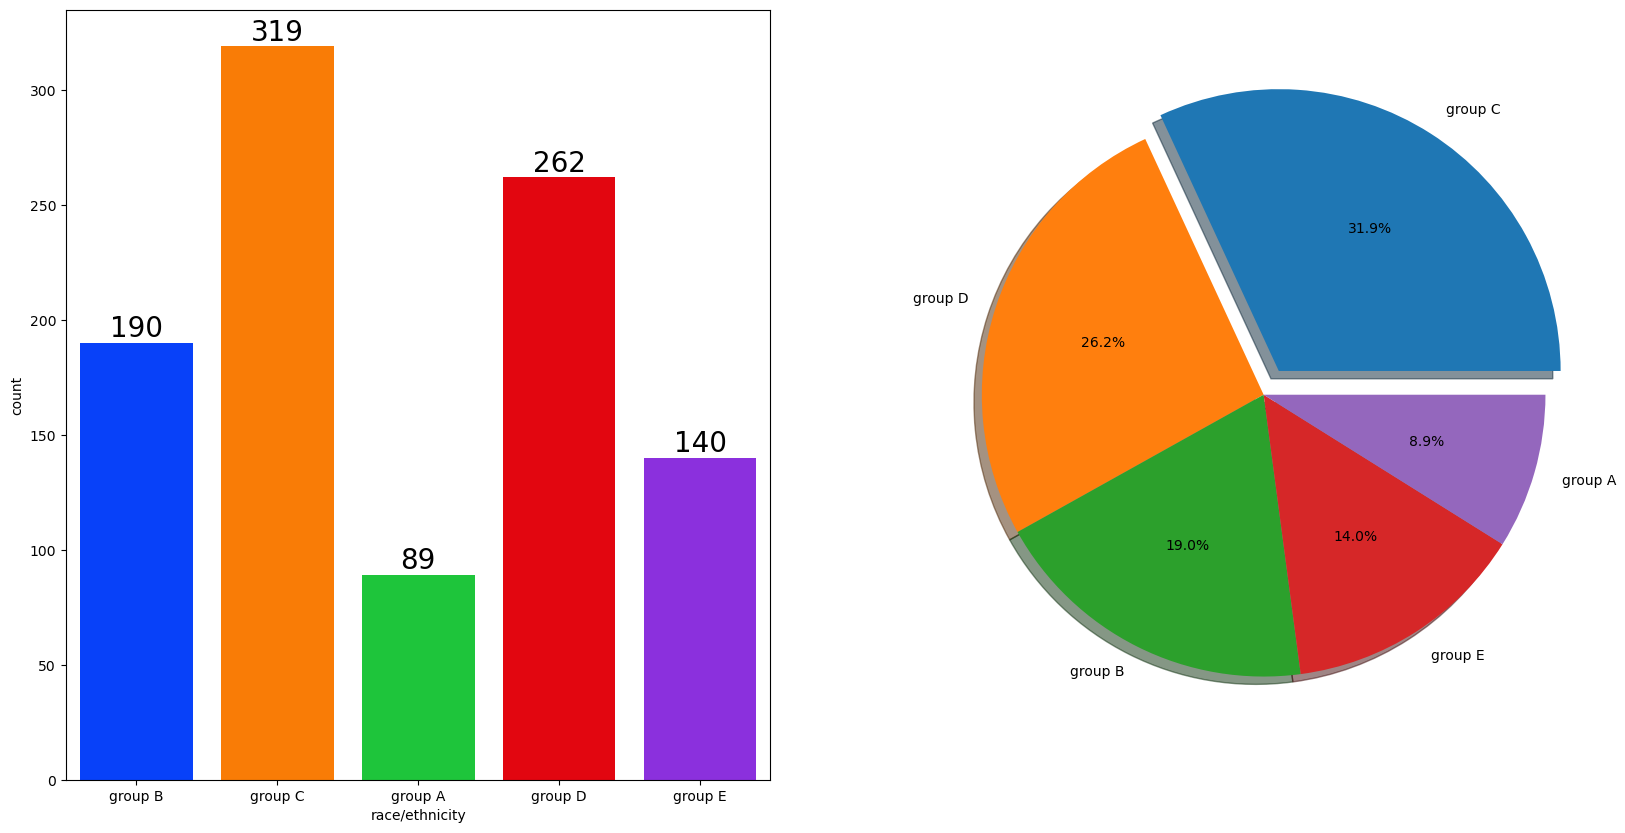

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS
* Is Race/Ehnicity has any impact on student's performance ? 

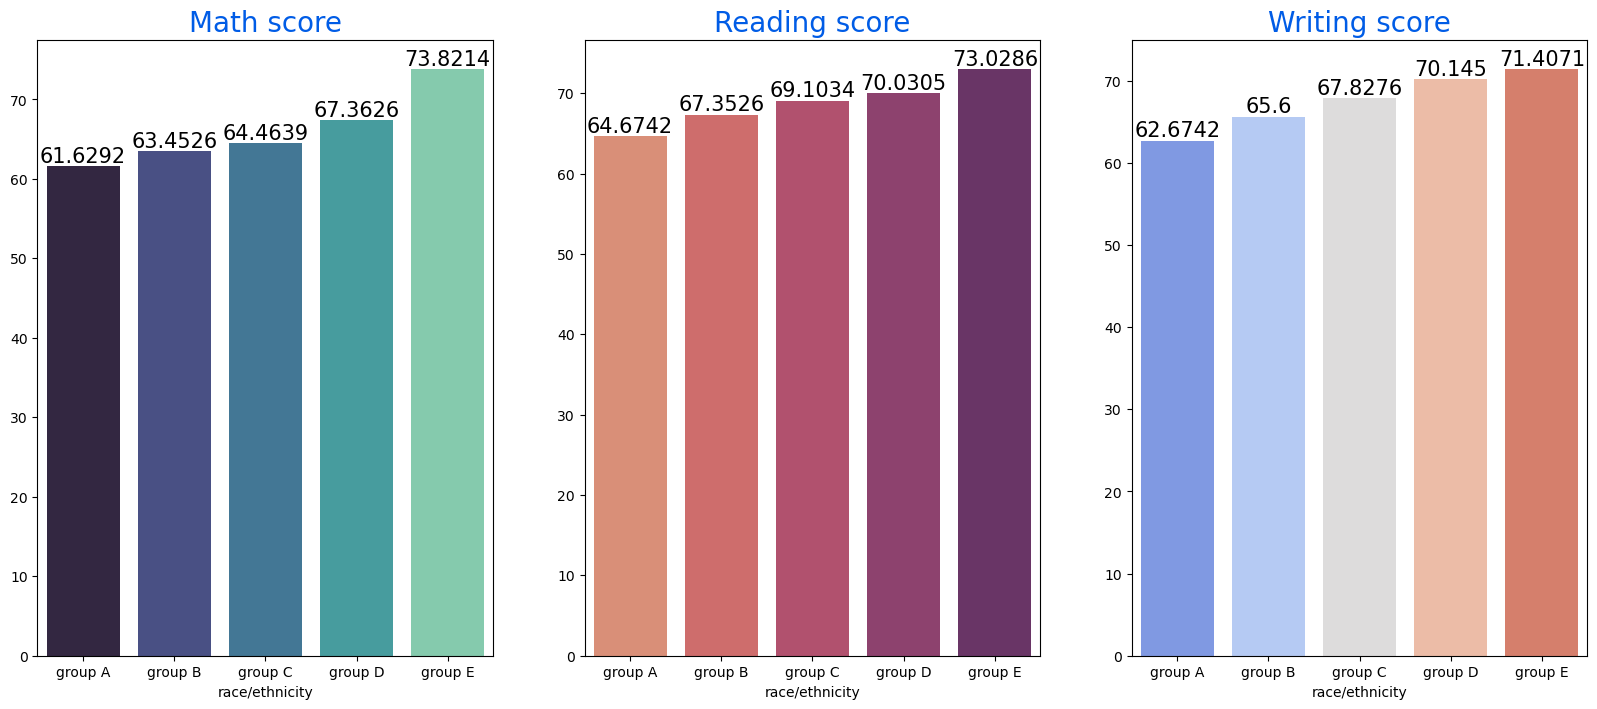

In [27]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS 
* What is educational background of student's parent ? 

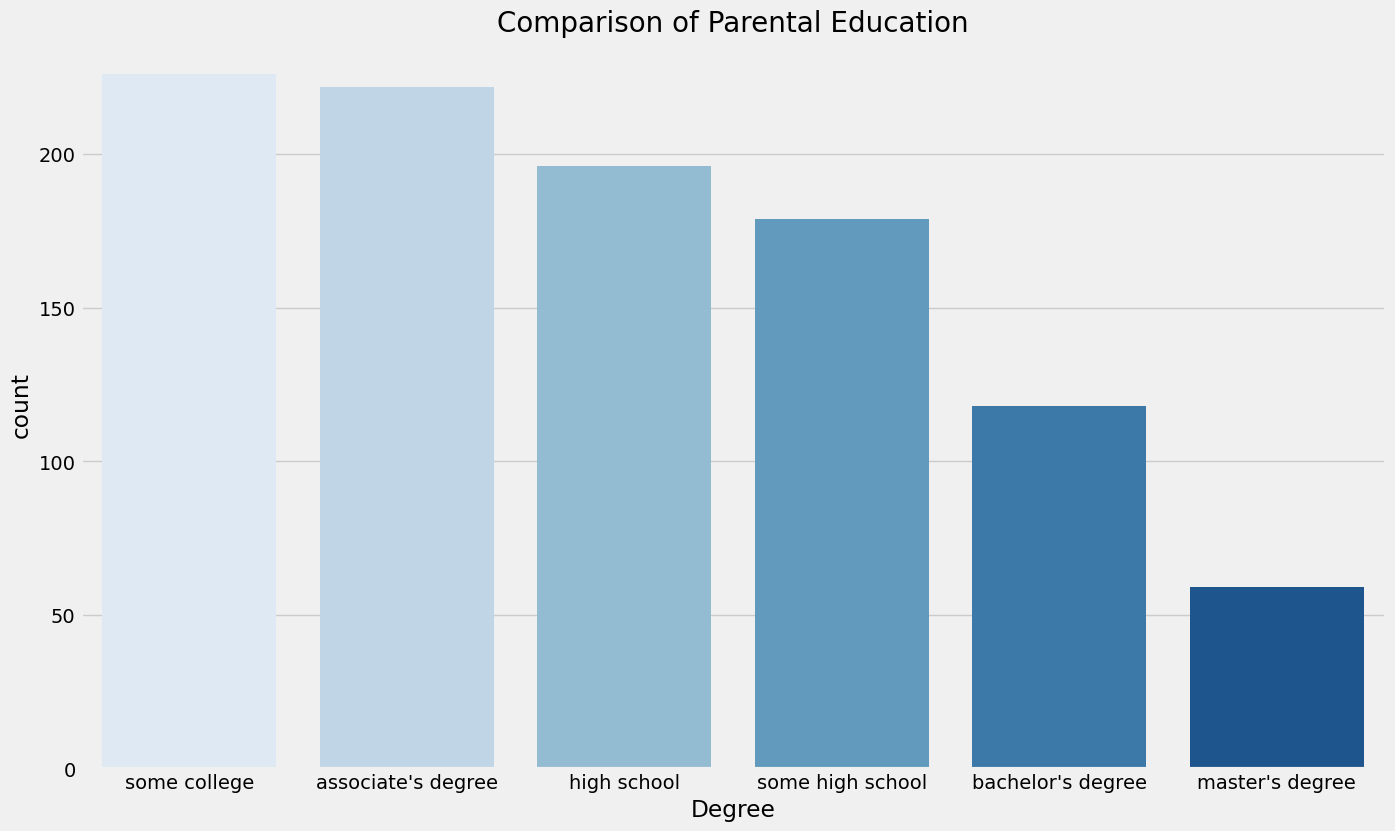

In [28]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

education_counts =df['parental level of education'].value_counts()

sns.barplot(x=education_counts.index, y=education_counts.values, palette='Blues')

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS 
Is parental education has any impact on student's performance ? 

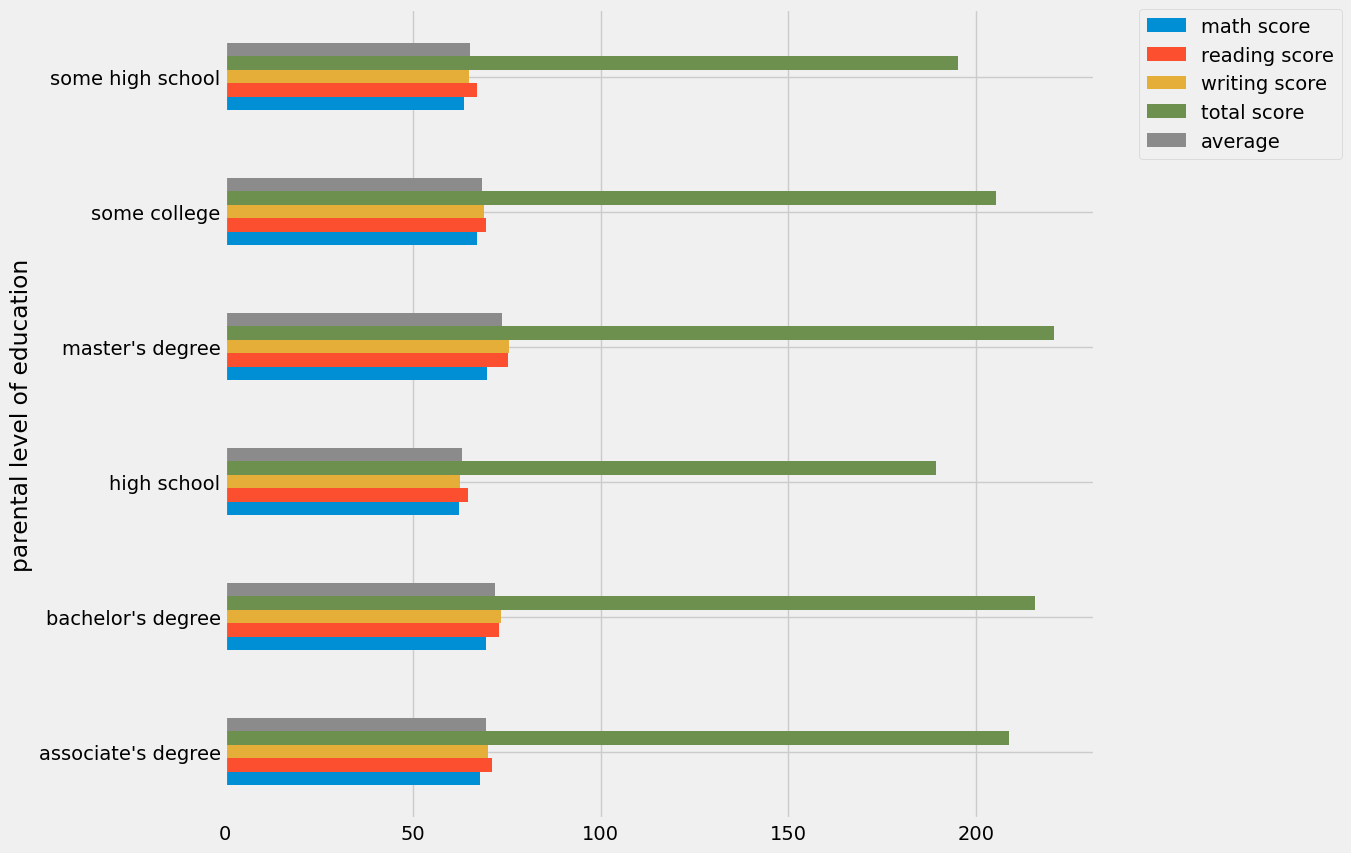

In [29]:
numeric_columns = df.select_dtypes(include=['number']).columns
df.groupby('parental level of education')[numeric_columns].mean().plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

####  LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS 
* Which type of lunch is most common amoung students ? 

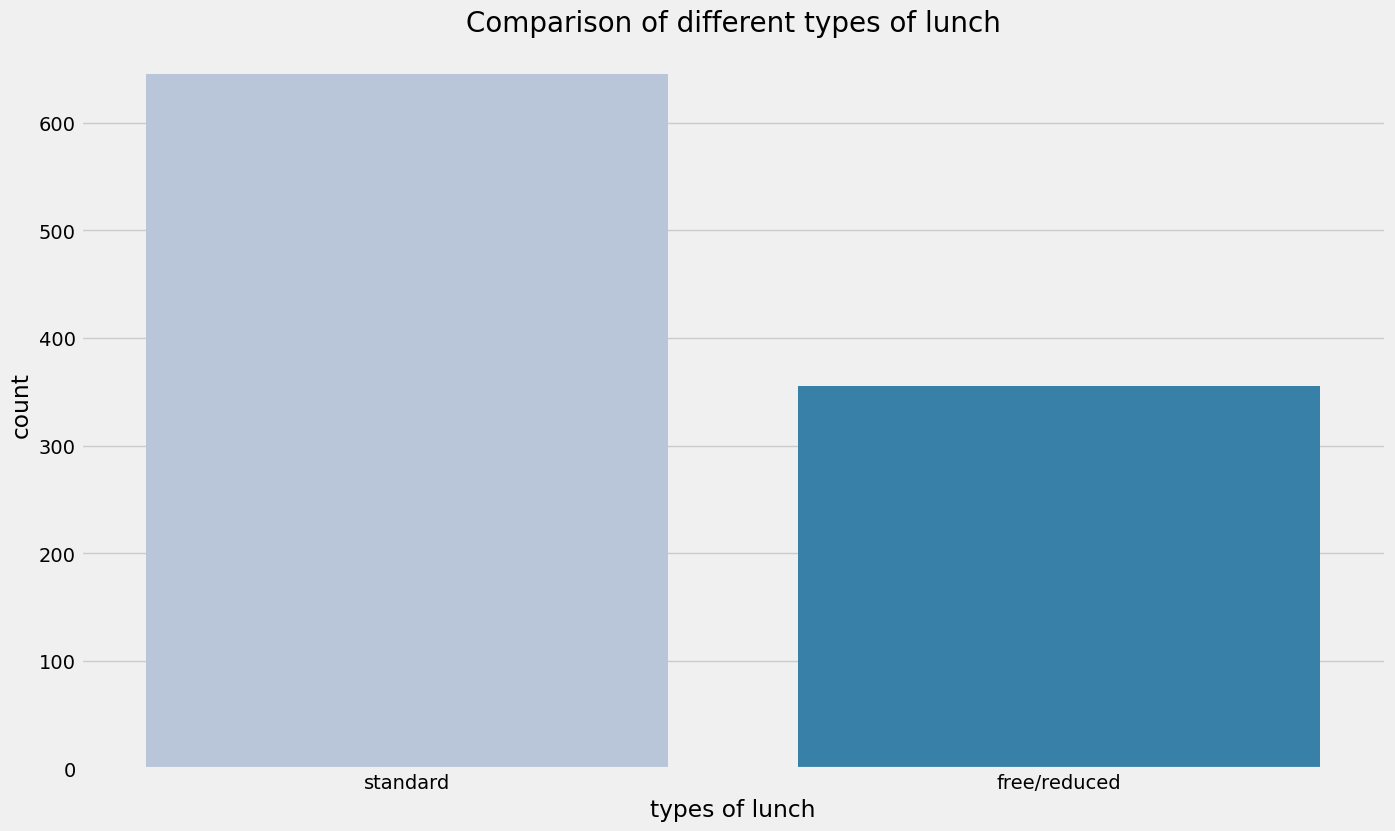

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(data=df ,x='lunch', palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS 
* Is lunch type intake has any impact on student's performance ? 

Text(0.5, 1.0, 'Students vs test preparation course ')

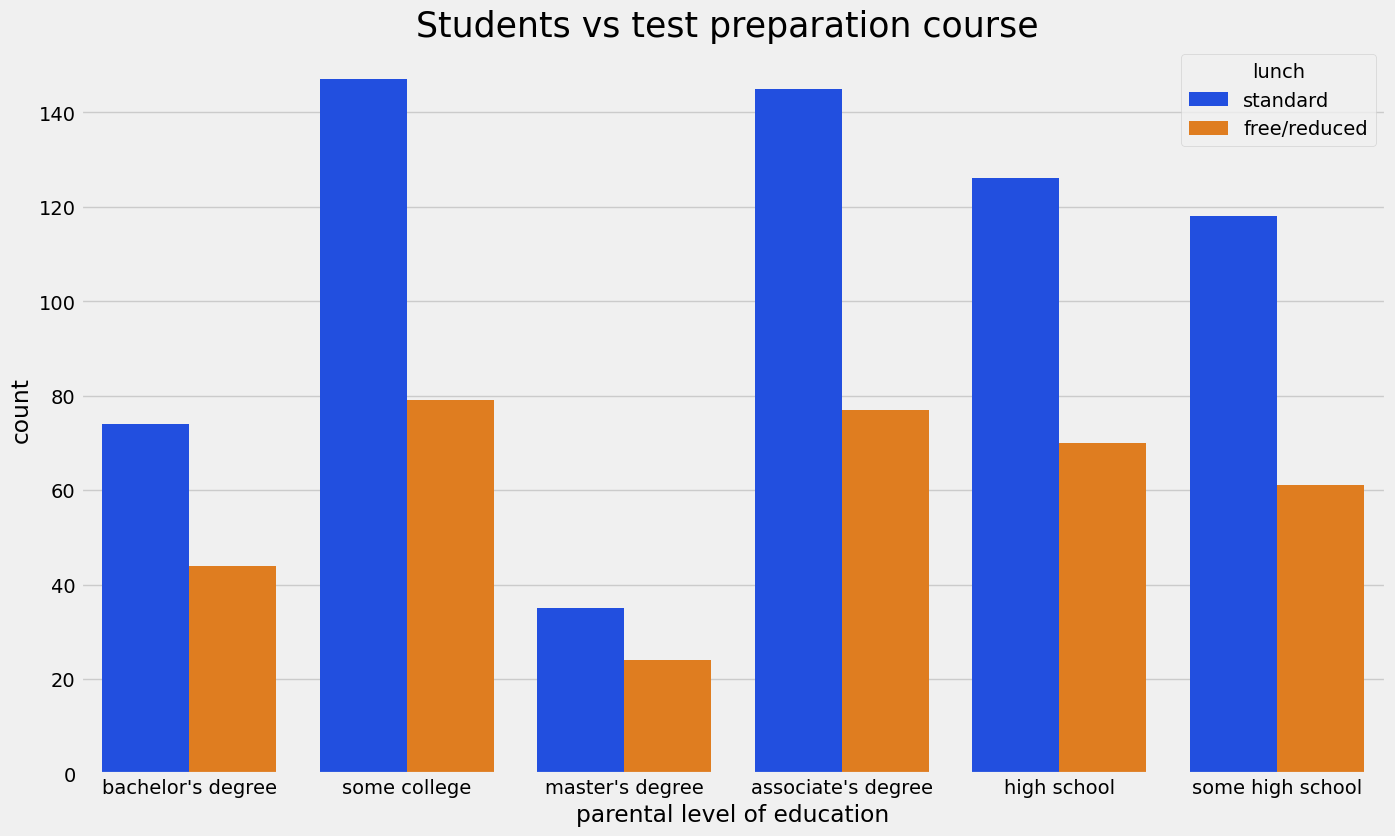

In [31]:
plt = sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch')
plt.set_title('Students vs test preparation course ',color='black',size=25)  

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

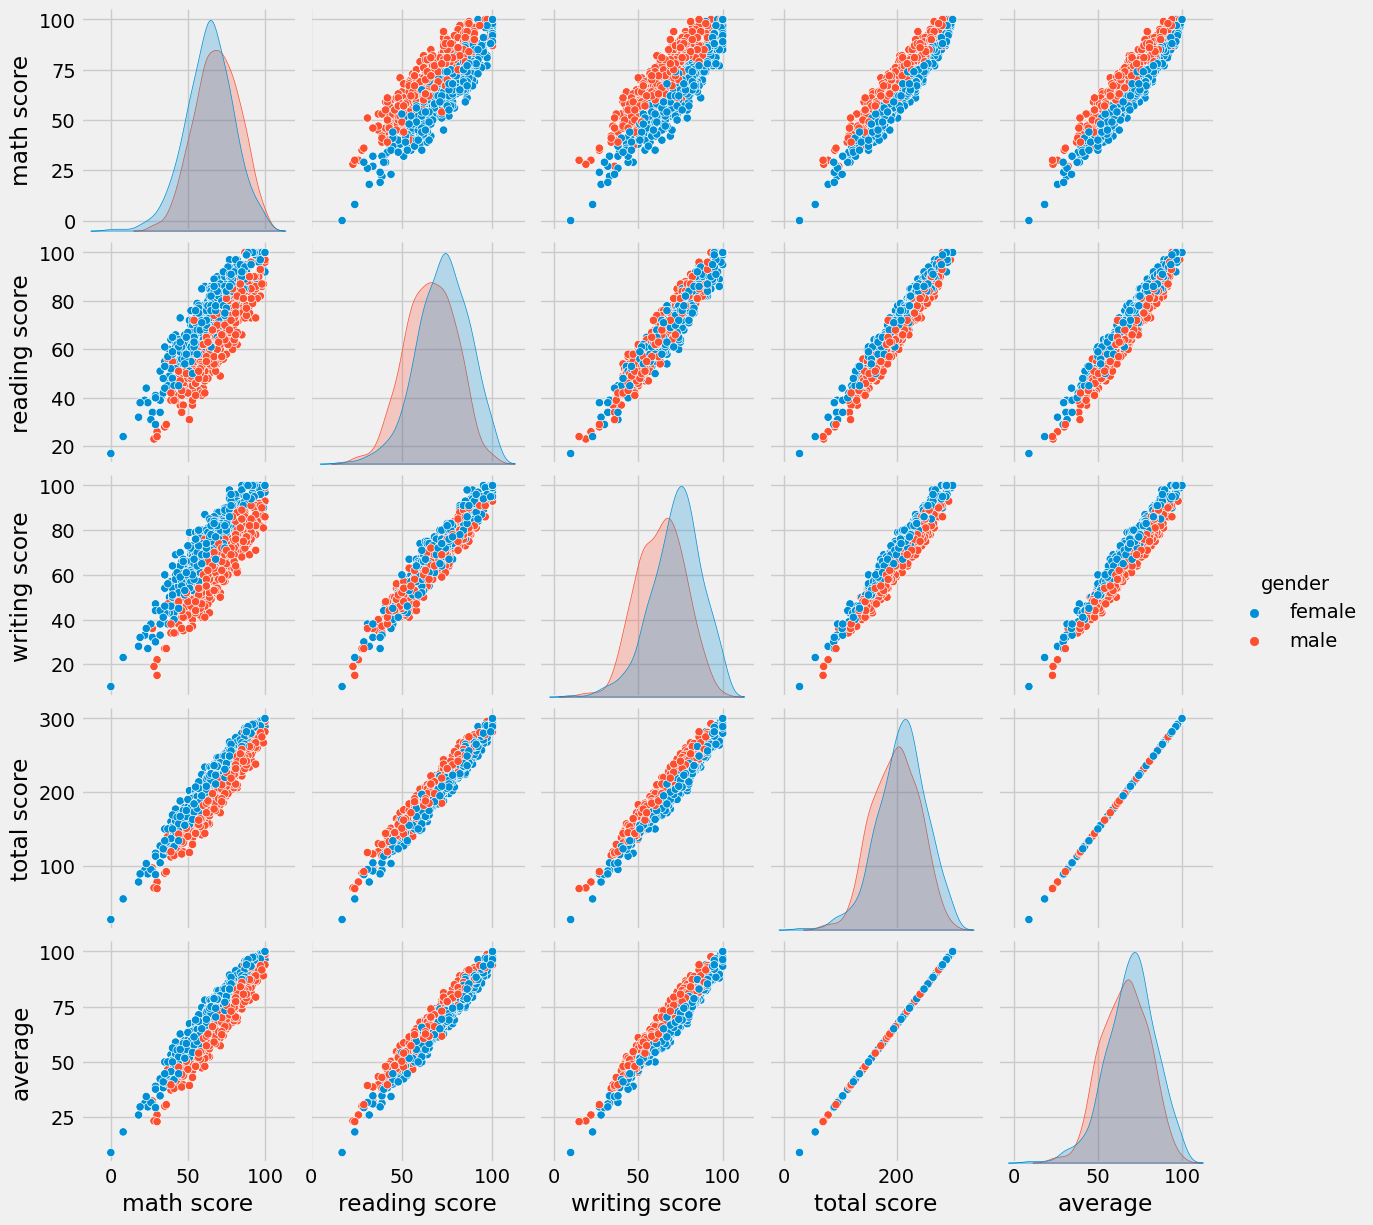

In [32]:
sns.pairplot(df,hue = 'gender')

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## 7) data Preprocessing (DPP)

#### CHECKING OUTLIERS

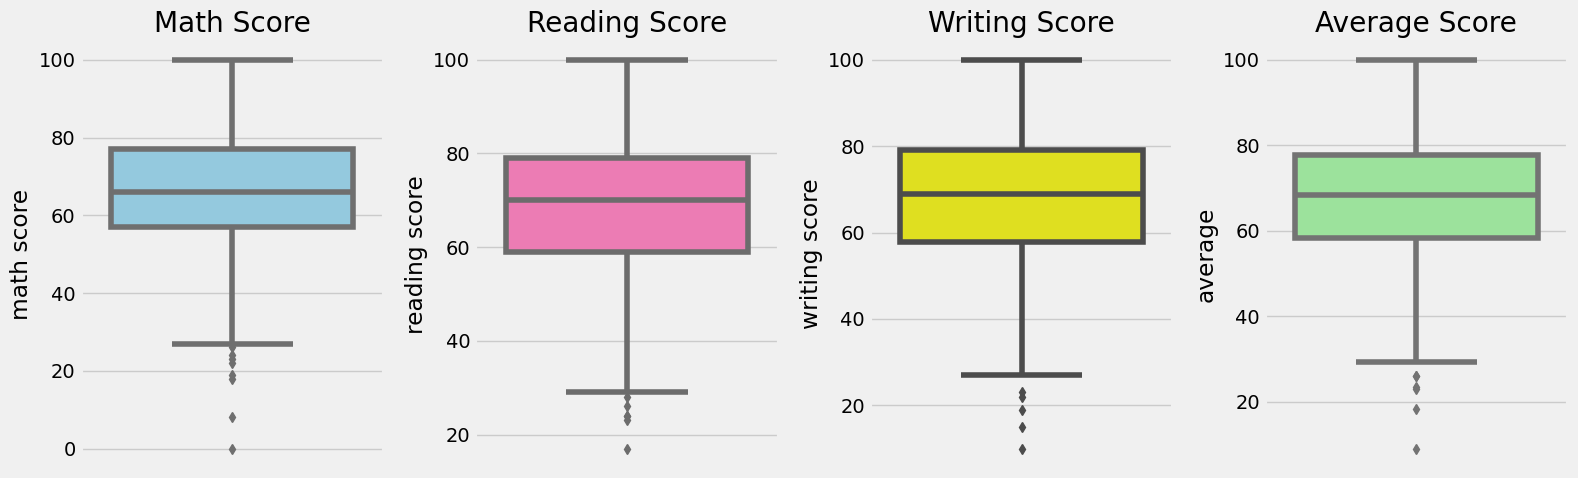

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=df['math score'], color='skyblue')
plt.title('Math Score')

plt.subplot(1, 4, 2)
sns.boxplot(y=df['reading score'], color='hotpink')
plt.title('Reading Score')

plt.subplot(1, 4, 3)
sns.boxplot(y=df['writing score'], color='yellow')
plt.title('Writing Score')

plt.subplot(1, 4, 4)
sns.boxplot(y=df['average'], color='lightgreen')
plt.title('Average Score')

plt.tight_layout()
plt.show()

**so ther are few outliers , let's deal with them** 

In [34]:
import numpy as np
import pandas as pd

def detect_outliers(data, n=0, features=None):
    
    outlier_indices = []
    
    if features is None:
        features = data.select_dtypes(include=[np.number]).columns.tolist()
    
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = pd.Series(outlier_indices)
    return outlier_indices[outlier_indices.duplicated(keep=False)].unique()

outliers_indices = detect_outliers(df)
print(f"Found {len(outliers_indices)} outliers")

Found 6 outliers


so just 6 outliers we can drop them 

In [35]:
df.drop(outliers_indices, inplace=True)

In [36]:
df.shape

(994, 10)

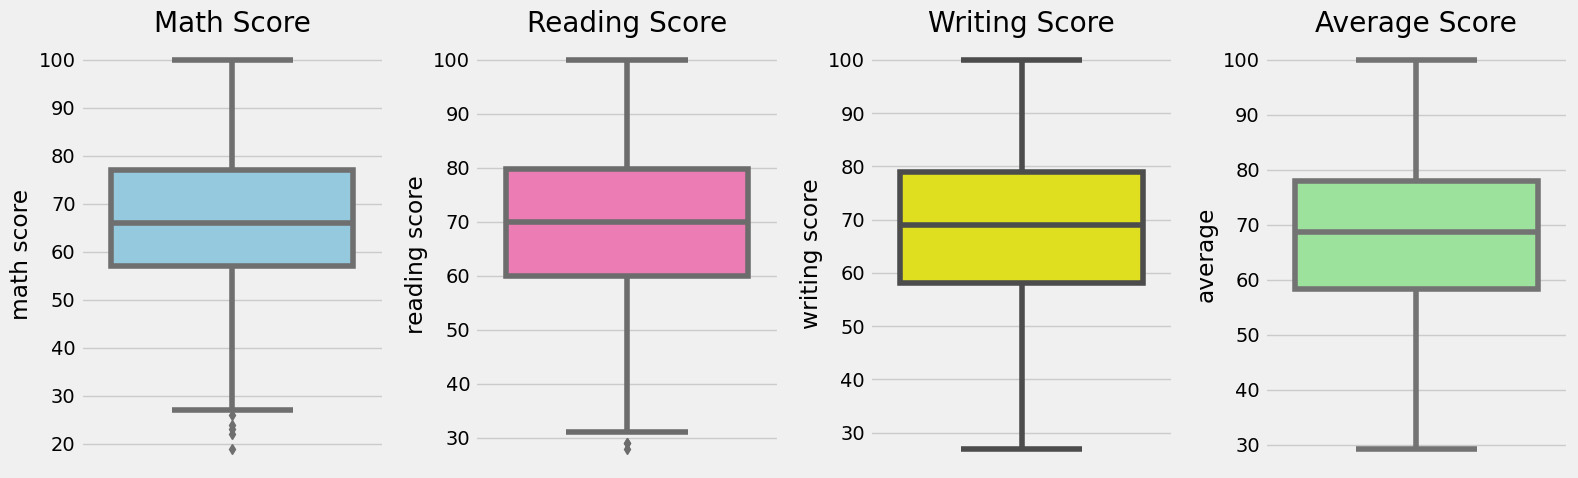

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=df['math score'], color='skyblue')
plt.title('Math Score')

plt.subplot(1, 4, 2)
sns.boxplot(y=df['reading score'], color='hotpink')
plt.title('Reading Score')

plt.subplot(1, 4, 3)
sns.boxplot(y=df['writing score'], color='yellow')
plt.title('Writing Score')

plt.subplot(1, 4, 4)
sns.boxplot(y=df['average'], color='lightgreen')
plt.title('Average Score')

plt.tight_layout()
plt.show()

### Now we don't have any outliers 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       994 non-null    object 
 1   race/ethnicity               994 non-null    object 
 2   parental level of education  994 non-null    object 
 3   lunch                        994 non-null    object 
 4   test preparation course      994 non-null    object 
 5   math score                   994 non-null    int64  
 6   reading score                994 non-null    int64  
 7   writing score                994 non-null    int64  
 8   total score                  994 non-null    int64  
 9   average                      994 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 85.4+ KB


## 8) Feature Selection

In [39]:
df = df[['gender', 'race/ethnicity',  'parental level of education', 'lunch', 'test preparation course' , 'math score', 'reading score', 'writing score']]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**So let's prepare X & Y**

In [40]:
X =df.drop(columns=['math score'],axis=1)

y =df['math score']

In [41]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [42]:
print(f"{df['gender'].nunique()} categories in the Gender {df['gender'].unique()}")

2 categories in the Gender ['female' 'male']


In [43]:
cat_column =df.select_dtypes(include='object').columns
for col in cat_column:
    print(f"{df[col].nunique()} categories in the {col} {df[col].unique()}")

2 categories in the gender ['female' 'male']
5 categories in the race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
6 categories in the parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
2 categories in the lunch ['standard' 'free/reduced']
2 categories in the test preparation course ['none' 'completed']


In [44]:
numerical_colums= X.select_dtypes(exclude ='object').columns
numerical_colums

Index(['reading score', 'writing score'], dtype='object')

**let's encode categorical columns**

In [45]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ohe =OneHotEncoder()
stdsclr =StandardScaler()
processor = ColumnTransformer(
    [
        ('OneHotEncoder',ohe,cat_column),
        ('StandardScaler',stdsclr ,numerical_colums),
    ]
)

## 9) Pick and Tune an Algorithm

In [46]:
X =processor.fit_transform(X)

In [47]:
print(X)

[[ 1.          0.          0.         ...  1.          0.18018555
   0.38325916]
 [ 1.          0.          0.         ...  0.          1.44693598
   1.33243775]
 [ 1.          0.          0.         ...  1.          1.7988111
   1.6714301 ]
 ...
 [ 1.          0.          0.         ...  0.          0.10981053
  -0.22692707]
 [ 1.          0.          0.         ...  0.          0.60243569
   0.58665457]
 [ 1.          0.          0.         ...  1.          1.16543588
   1.19684081]]


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=42,test_size=0.2,)
x_train.shape, x_test.shape

((795, 19), (199, 19))

In [50]:
###############################################################

In [51]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [52]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "Lasso":Lasso(),
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

## 10) Validate and Evaluate

In [53]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')
    y_pred = model.predict(x_test)
    print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')  
    print(f'R2 Score: {r2_score(y_test, y_pred)}') 
    print('-'*30)

Using model: LR
Training Score: 0.8674193461987637
Test Score: 0.8705951799128845
MSE Score: 5.419130602226008
R2 Score: 0.8705951799128845
------------------------------
Using model: KNNR
Training Score: 0.8463087729823525
Test Score: 0.7968628744351288
MSE Score: 6.789675875361231
R2 Score: 0.7968628744351288
------------------------------
Using model: Lasso
Training Score: 0.7931446775951977
Test Score: 0.8154578342889917
MSE Score: 6.47145890385402
R2 Score: 0.8154578342889917
------------------------------
Using model: SVR
Training Score: 0.8101437739044908
Test Score: 0.7864375134343422
MSE Score: 6.9617251856529325
R2 Score: 0.7864375134343422
------------------------------
Using model: DT
Training Score: 0.9999142978691882
Test Score: 0.7203106841835165
MSE Score: 7.966954362179139
R2 Score: 0.7203106841835165
------------------------------
Using model: RF
Training Score: 0.9759413011184123
Test Score: 0.8459342480903536
MSE Score: 5.912994091034001
R2 Score: 0.8459342480903536

In [54]:
# this will help in our deployment
import joblib
from sklearn.pipeline import Pipeline

# Save the ENTIRE pipeline (preprocessor + model)
pipeline = Pipeline([
    ('preprocessor', processor),  
    ('model', model)              
])

joblib.dump(pipeline, 'pipeline.pkl')  

['pipeline.pkl']

## 11) Best Model Selection

In [55]:
results = []

for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'RMSE': rmse,
        'R2': r2
    })
    
    print(f'Training Score: {train_score}')
    print(f'Test Score: {test_score}')
    print(f'RMSE: {rmse}')
    print(f'R2 Score: {r2}')
    print('-' * 30)

results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values('Test Score', ascending=False)

print("\n=== Models Ranked by Test Score (Descending) ===")
print(results_df_sorted)

Using model: LR
Training Score: 0.8674193461987637
Test Score: 0.8705951799128845
RMSE: 5.419130602226008
R2 Score: 0.8705951799128845
------------------------------
Using model: KNNR
Training Score: 0.8463087729823525
Test Score: 0.7968628744351288
RMSE: 6.789675875361231
R2 Score: 0.7968628744351288
------------------------------
Using model: Lasso
Training Score: 0.7931446775951977
Test Score: 0.8154578342889917
RMSE: 6.47145890385402
R2 Score: 0.8154578342889917
------------------------------
Using model: SVR
Training Score: 0.8101437739044908
Test Score: 0.7864375134343422
RMSE: 6.9617251856529325
R2 Score: 0.7864375134343422
------------------------------
Using model: DT
Training Score: 0.9999142978691882
Test Score: 0.7017547783443738
RMSE: 8.22699319833359
R2 Score: 0.7017547783443738
------------------------------
Using model: RF
Training Score: 0.9759213052637711
Test Score: 0.8440940104764366
RMSE: 5.948203128964936
R2 Score: 0.8440940104764366
------------------------------

# So Our Champion Model is : Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model = model.fit(x_train, y_train)

In [57]:
y_predict = model.predict(x_test)
r2_Score = r2_score(y_test, y_predict)*100
print(f"accuracy is {round(r2_Score,2)}%")

accuracy is 87.06%


Text(0, 0.5, 'Predicted value')

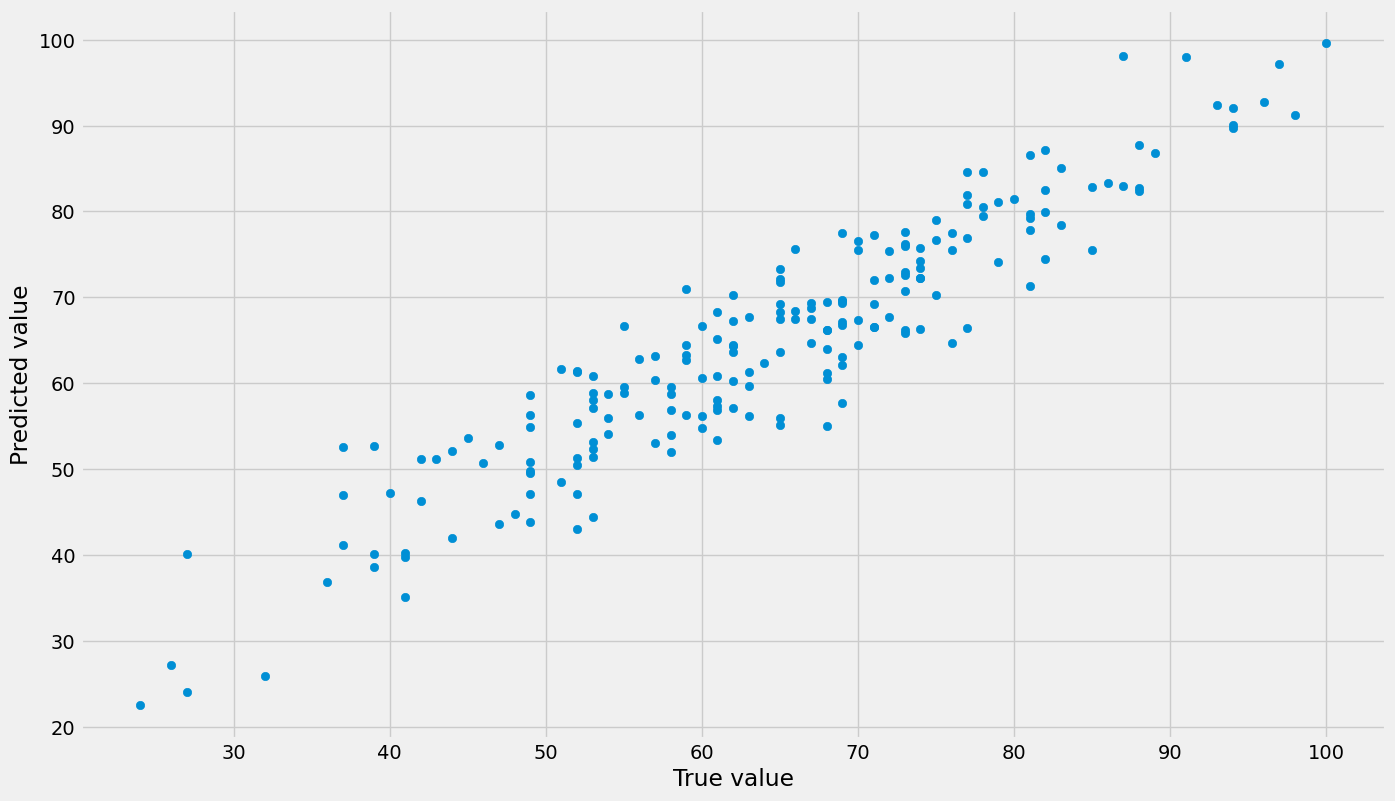

In [58]:
plt.scatter(y_test,y_predict)
plt.xlabel("True value")
plt.ylabel("Predicted value")

<AxesSubplot:xlabel='math score'>

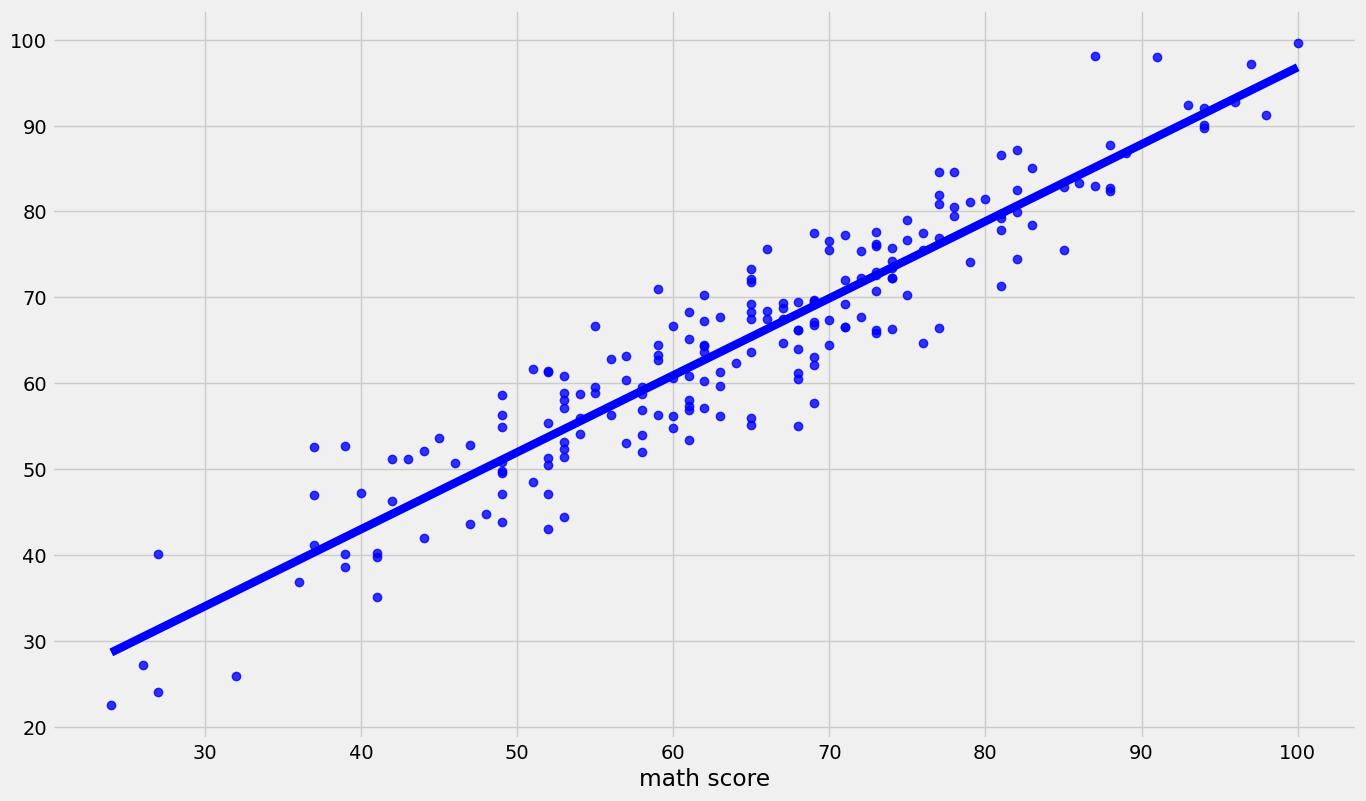

In [59]:
sns.regplot(x=y_test, y=y_predict,ci=None ,color='blue')

## So let's try to optimize our model 

**Feature Engineering**
* Scale features
* Add polynomial features

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

**Regularization**

In [62]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5).fit(x_train, y_train)

**GridSearchCV**

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameters to test
param_grid = {
    'fit_intercept': [True, False],  # Test with/without intercept
    'positive': [True, False]        # Force positive coefficients 
}

In [64]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=LinearRegression(),  
    param_grid=param_grid,         
    cv=5,                          # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metric to optimize (RMSE)
    verbose=1                      # Print progress
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Best model (automatically refitted on full training data)
best_model = grid_search.best_estimator_

# Performance on test set
y_pred = best_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Best parameters: {'fit_intercept': True, 'positive': False}
Test RMSE: 5.42


## Compare Default vs. Tuned Model

In [66]:
# Default model
default_model = LinearRegression()
default_model.fit(x_train, y_train)
default_rmse = np.sqrt(mean_squared_error(y_test, default_model.predict(x_test)))

# Tuned model
tuned_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(x_test)))

print(f"Default RMSE: {default_rmse:.2f}")
print(f"Tuned RMSE: {tuned_rmse:.2f}")

Default RMSE: 5.42
Tuned RMSE: 5.42


**Model Deployment**

In [67]:
feature_names = ['gender', 'race/ethnicity',  'parental level of education', 'lunch', 'test preparation course' , 'reading score', 'writing score'] 

joblib.dump(model, 'model.h5')          
joblib.dump(scaler, 'scaler.h5')        
joblib.dump(feature_names, 'features.h5')  

['features.h5']

# 12) Project Deployment

In [69]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set up the app
st.set_page_config(page_title="Student Performance Predictor", layout="wide")
st.title("Student Math Score Prediction")
st.write("This app predicts a student's math score based on various factors")

# --- Input Widgets ---
st.sidebar.header("Student Information")

# Define categorical options (must match training data exactly)
gender_options = ['female', 'male']
ethnicity_options = ['group A', 'group B', 'group C', 'group D', 'group E']
parental_education_options = ["some high school", "high school", "some college", 
                            "associate's degree", "bachelor's degree", "master's degree"]
lunch_options = ['standard', 'free/reduced']
test_prep_options = ['none', 'completed']

# Create input widgets
gender = st.sidebar.selectbox("Gender", gender_options)
ethnicity = st.sidebar.selectbox("Race/Ethnicity", ethnicity_options)
parental_education = st.sidebar.selectbox("Parental Education Level", parental_education_options)
lunch = st.sidebar.selectbox("Lunch Type", lunch_options)
test_prep = st.sidebar.selectbox("Test Preparation Course", test_prep_options)
reading_score = st.sidebar.slider("Reading Score", 0, 100, 70)
writing_score = st.sidebar.slider("Writing Score", 0, 100, 70)

# --- Prediction Function ---
def predict_math_score():
    try:
        # Load the full pipeline
        pipeline = joblib.load('pipeline.pkl')
        
        # Create input DataFrame (column names must match training data)
        input_data = pd.DataFrame({
            'gender': [gender],
            'race/ethnicity': [ethnicity],
            'parental level of education': [parental_education],
            'lunch': [lunch],
            'test preparation course': [test_prep],
            'reading score': [reading_score],
            'writing score': [writing_score]
        })
        
        # Make prediction (pipeline handles all preprocessing)
        prediction = pipeline.predict(input_data)[0]
        st.success(f"Predicted Math Score: {prediction:.1f}")
        
    except Exception as e:
        st.error(f"Prediction failed: {str(e)}")

# --- Run Prediction ---
if st.sidebar.button("Predict Math Score"):
    predict_math_score()

# --- Explanatory Sections ---
st.header("How It Works")
st.markdown("""
This model predicts math scores using:
- **Demographics**: Gender, ethnicity
- **Background**: Parental education, lunch type
- **Scores**: Reading and writing marks
- **Preparation**: Test prep course status
""")

st.header("Key Insights")
col1, col2 = st.columns(2)

with col1:
    st.subheader("Performance by Gender")
    st.markdown("""
    - 🚺 Females score higher in reading/writing
    - 🚹 Males score higher in math
    """)

with col2:
    st.subheader("Lunch Impact")
    st.markdown("""
    - 🍎 Standard lunch → Higher scores
    - 🥗 Free/reduced → Slightly lower scores
    """)

# --- Batch Prediction Section ---
st.header("Batch Predictions")
uploaded_file = st.file_uploader("Upload CSV for multiple predictions", type=["csv"])

if uploaded_file is not None:
    try:
        batch_data = pd.read_csv(uploaded_file)
        pipeline = joblib.load('pipeline.pkl')
        
        # Check required columns
        required_cols = ['gender', 'race/ethnicity', 'parental level of education',
                       'lunch', 'test preparation course', 'reading score', 'writing score']
        
        if all(col in batch_data.columns for col in required_cols):
            predictions = pipeline.predict(batch_data)
            batch_data['predicted_math_score'] = predictions.round(1)
            
            st.dataframe(batch_data)
            
            csv = batch_data.to_csv(index=False).encode('utf-8')
            st.download_button(
                "Download Predictions",
                data=csv,
                file_name='math_score_predictions.csv',
                mime='text/csv'
            )
        else:
            missing = [col for col in required_cols if col not in batch_data.columns]
            st.error(f"Missing columns: {', '.join(missing)}")
            
    except Exception as e:
        st.error(f"Batch prediction failed: {str(e)}")

Overwriting app.py


In [71]:
!streamlit run app.py

^C


# THANKS EPSILON :)